In [5]:
import pandas as pd
import cv2
import os
from collections import defaultdict
from sklearn.model_selection import train_test_split
from skimage import feature
import numpy as np
from skimage.filters import gabor

import cv2
import mahotas as mh
import numpy as np

# Define a function to extract Zernike moments features
def extract_zernike_moments(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute Zernike moments features
    zernike_moments = mh.features.zernike_moments(gray_image, degree=8, radius=8)
    
    return zernike_moments


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
from collections import defaultdict
image_dir = r'/kaggle/input/palmprint2/Left Hand-20230918T155734Z-001/Left Hand'
import cv2
# List all files in the directory
all_files = os.listdir(image_dir)

# Filter out only the image filenames
image_filenames = [filename for filename in all_files if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
sorted_image_filenamesL = sorted(image_filenames)
left_label=[int(i[:3]) for i in sorted_image_filenamesL]
left = defaultdict(list)
j=0
for i in left_label:
    image_path = os.path.join(image_dir, sorted_image_filenamesL[j])
    # Load image using cv2
    image = cv2.imread(image_path)
    left[i].append(extract_zernike_moments(image))
    j+=1

In [7]:
print(left[1])

[array([0.31830989, 0.00737391, 0.00515099, 0.00372084, 0.0124555 ,
       0.01302643, 0.00776043, 0.00583747, 0.00881355, 0.01826205,
       0.0197055 , 0.02726413, 0.00700704, 0.00701137, 0.01280934,
       0.03597208, 0.02786955, 0.03166724, 0.03451033, 0.02586565,
       0.00933142, 0.00801067, 0.0164651 , 0.0492434 , 0.01393055]), array([0.31830989, 0.00470457, 0.00525742, 0.01129755, 0.00806886,
       0.01272158, 0.00475007, 0.02012745, 0.0323807 , 0.01230339,
       0.02380828, 0.01735691, 0.00201335, 0.02034757, 0.03991454,
       0.00282836, 0.01914811, 0.03510041, 0.02860473, 0.01135713,
       0.01149293, 0.02101204, 0.03816066, 0.00355572, 0.02086613]), array([0.31830989, 0.00504456, 0.00695976, 0.01201918, 0.0034555 ,
       0.00616242, 0.01287682, 0.02026647, 0.00755761, 0.0054496 ,
       0.01126434, 0.00941854, 0.01032703, 0.02795467, 0.01382258,
       0.00297215, 0.00971859, 0.01337672, 0.01021663, 0.01837378,
       0.00142266, 0.0335903 , 0.02738596, 0.00466528, 0.

In [8]:
print(len(left[1][0]))

25


In [9]:
from collections import defaultdict
image_dir = r'/kaggle/input/palmprint2/Right Hand-20230918T155917Z-001/Right Hand'
import cv2
# List all files in the directory
all_files = os.listdir(image_dir)

# Filter out only the image filenames
image_filenames = [filename for filename in all_files if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
sorted_image_filenamesR = sorted(image_filenames)
right_label=[int(i[:3]) for i in sorted_image_filenamesR]
right = defaultdict(list)
j=0
for i in right_label:
    image_path = os.path.join(image_dir, sorted_image_filenamesR[j])
    # Load image using cv2
    image = cv2.imread(image_path)
    right[i].append(extract_zernike_moments(image))
    j+=1

Corrupt JPEG data: premature end of data segment


In [10]:
print(len(right[1][0]))

25


## Intra-Class Variability

In [11]:
import numpy as np
#Intra Variability
intra_left=defaultdict(list)
mean_left=defaultdict(list)
mean_right=defaultdict(list)
for i in range(1,231):
    mean_lbp=np.mean(left[i],axis=0)
    mean_left[i]=mean_lbp
    intra_left[i]=[np.linalg.norm(mean_lbp - sample_lbp) for sample_lbp in left[i]]
intra_right=defaultdict(list)
for i in range(1,231):
    mean_lbp=np.mean(right[i],axis=0)
    mean_right[i]=mean_lbp
    intra_right[i]=[np.linalg.norm(mean_lbp - sample_lbp) for sample_lbp in right[i]]

In [12]:
print(intra_left[1])
print(intra_right[1])

[0.04423618590587747, 0.05223304866592067, 0.04114041230100927, 0.04375552210819275, 0.026453485984535795, 0.027841644768973443]
[0.03356671921306926, 0.02510103530701133, 0.036881985155919346, 0.046277532031443476, 0.030231351140144466]


## Inter-Class Variability

In [13]:
from sklearn.metrics.pairwise import euclidean_distances
print("Left Hand - Mean Inter-class Distance:", np.mean(euclidean_distances(list(mean_left.values()))))
print("Left Hand - Standard Deviation of Inter-class Distance:", np.std(euclidean_distances(list(mean_left.values()))))
print("\nRight Hand - Mean Inter-class Distance:", np.mean(euclidean_distances(list(mean_right.values()))))
print("Right Hand - Standard Deviation of Inter-class Distance:", np.std(euclidean_distances(list(mean_right.values()))))

Left Hand - Mean Inter-class Distance: 0.029577214208103282
Left Hand - Standard Deviation of Inter-class Distance: 0.009570971314407551

Right Hand - Mean Inter-class Distance: 0.03302328602635713
Right Hand - Standard Deviation of Inter-class Distance: 0.011934274573432513


#### Zernike Moments

In [14]:
print(len(mean_left),len(mean_right))
print(mean_left[1])

230 230
[0.31830989 0.00617114 0.00419765 0.0105352  0.00878611 0.00779855
 0.00690191 0.01577647 0.01150951 0.01385658 0.01285844 0.01928675
 0.00715944 0.0199014  0.01419727 0.01848367 0.0207261  0.01896739
 0.02736769 0.02317895 0.0071836  0.0215072  0.01941559 0.02372083
 0.02018852]


### Checking Inter-Class Variability for a particular person

#### At Threshold_1

In [15]:
checker=mean_left[1]
threshold_1=np.mean((euclidean_distances(list(mean_left.values()))))
k=[]
for i in range(2,231):
    k.append(np.linalg.norm(checker-mean_left[i]))
k<threshold_1

array([False,  True, False, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
        True,  True,

In [16]:
FP_1=len([1 for i in k<threshold_1 if i==True])
TN_1=len([0 for i in k<threshold_1 if i==False])
FPR_1=FP_1/(FP_1+TN_1)
h=[]
for c in range(1,6):
    h.append(abs(np.linalg.norm(left[1][c]-mean_left[1])))
TP_1=len([1 for c in h<threshold_1 if c==True])
FN_1=len([0 for c in h<threshold_1 if c==False])
TPR_1=TP_1/(TP_1+FN_1)
print('False Positive: ',FP_1)
print('True Negative: ',TN_1)
print('True Positive:',TP_1)
print('False Negative:',FN_1)
print('False Positive Rate: ',FPR_1)
print('True Positive Rate:',TPR_1)

False Positive:  159
True Negative:  70
True Positive: 2
False Negative: 3
False Positive Rate:  0.6943231441048034
True Positive Rate: 0.4


In [17]:
threshold_1

0.029577214208103282

In [18]:
threshold_array = np.arange(threshold_1, 0, -0.0002)
FPR=[]
TPR=[]
for i in threshold_array:
    k=[]
    h=[]
    for j in range(2,231):
        k.append(abs(np.linalg.norm(checker-mean_left[j])))
    for c in range(1,6):
        h.append(abs(np.linalg.norm(left[1][c]-mean_left[1])))    
    FP=len([1 for c in k<i if c==True])
    TN=len([0 for c in k<i if c==False])
    TP=len([1 for c in h<i if c==True])
    FN=len([0 for c in h<i if c==False])
    FPR.append(FP/(FP+TN))
    TPR.append(TP/(TP+FN))

In [19]:
print(TPR)
print(FPR)

[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.6943231441048034, 0.6943231441048034, 0.6812227074235808, 0.6724890829694323, 0.6681222707423581, 0.6550218340611353, 0.6419213973799127, 0.6375545851528385, 0.6200873362445415, 0.611353711790393, 0.6026200873362445, 0.5938864628820961, 0.5807860262008734,

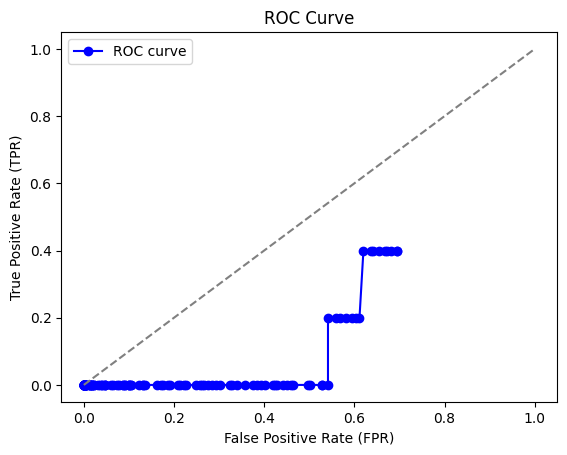

In [20]:
import matplotlib.pyplot as plt

# Hypothetical TPR and FPR values for different thresholds
# Replace these with actual values from your model
#thresholds = [0.01959017974191824, 0.019, 0.0185, 0.018, 0.0175]  # Example threshold values
#tpr_values = tpr  # Example TPR values corresponding to the thresholds
#fpr_values = fpr  # Example FPR values corresponding to the thresholds

# Plot ROC curve
plt.plot(FPR, TPR, color='b', marker='o', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()
